In [27]:
%load_ext autoreload
%autoreload 2
import os
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from tqdm import tqdm
import pandas as pd
import pickle as pkl
import notebook_helper
import sys
from mprompt.modules import fmri
import seaborn as sns
from mprompt.data.data import TASKS_D3
import numpy as np
from scipy.special import softmax
from collections import defaultdict

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Look at datasets

In [29]:
d = defaultdict(list)
for task_name in TASKS_D3:
    task = TASKS_D3[task_name]
    d['Task Name'].append(task_name[task_name.index('_')+1:])
    d['Explanation (groundtruth)'].append(task['groundtruth_explanation'])
    data = task['gen_func'](return_df=True)
    d['Example'].append(data['input'][data['label'] == 1].iloc[0])
    d['# Examples'].append(len(data))
    d['Majority class fraction'].append(data['label'].mean().round(2))
df = pd.DataFrame.from_dict(d)

# display dataframe with clipping strings
with pd.option_context('display.max_colwidth', 100):
    display(df)
    df.to_latex('../results/figs/synthetic_examples_full.tex', index=False)
    df[::3].to_latex('../results/figs/synthetic_examples.tex', index=False)

,Task Name,Explanation (groundtruth),Example,# Examples,Majority class fraction
0,0_irony,contains irony,I reckon straight women fancy victoria secret models more than straight men do #victoriasecret #...,590,0.38
1,1_objective,is a more objective description of what happened,"nobody talks about what happened five years ago, but something shifts beneath the surface of the...",739,0.50
2,2_subjective,contains subjective opinion,"screenwriter maureen tilyou, director martin duffy and an extremely competent cast handle the co...",757,0.50
3,3_god,believes in god,Sanctify them through Thy Truth: Thy Word is Truth John 17:17 KJV #SemST,164,0.71
4,4_atheism,is against religion,Imagine a species that had split the atom and ventured into space yet most still believe a magic...,172,0.14
5,5_evacuate,involves a need for people to evacuate,""" hundreds of people have been evacuated , most of them from the masirah island , "" an oman civi...",2670,0.04
6,6_terorrism,describes a situation that involves terrorism,The Government of Ethiopia says `I apprehended terrorists sent from Eritrea and killed those who...,2640,0.06
7,7_crime,involves crime,Among those are some who are still called priests while they should be called genocide perpetrat...,2621,0.17
8,8_shelter,describes a situation where people need shelter,"major nigel cribb , commanding officer of 59 commando said "" the construction of winterised shel...",2620,0.12
9,9_food,is related to food security,"The EPRDF regime's administrators of the central zone of, Ahferom sub zone,Tabiya Hoya, of, are ...",2642,0.13


/tmp/ipykernel_4076326/1316839828.py:15: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex('../results/figs/synthetic_examples_full.tex', index=False)
/tmp/ipykernel_4076326/1316839828.py:16: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df[::3].to_latex('../results/figs/synthetic_examples.tex', index=False)


### Visualize data matrix

In [2]:
fname = '../results/mean_preds_matrix_d3___instructor.pkl'
# fname = '../results/mean_preds_matrix_d3___facebook__opt-iml-max-30b.pkl'
# mat = pkl.load(open('../results/mean_preds_matrix_d3.pkl', 'rb'))
mat = pkl.load(open(fname, 'rb'))
n = mat.shape[0]

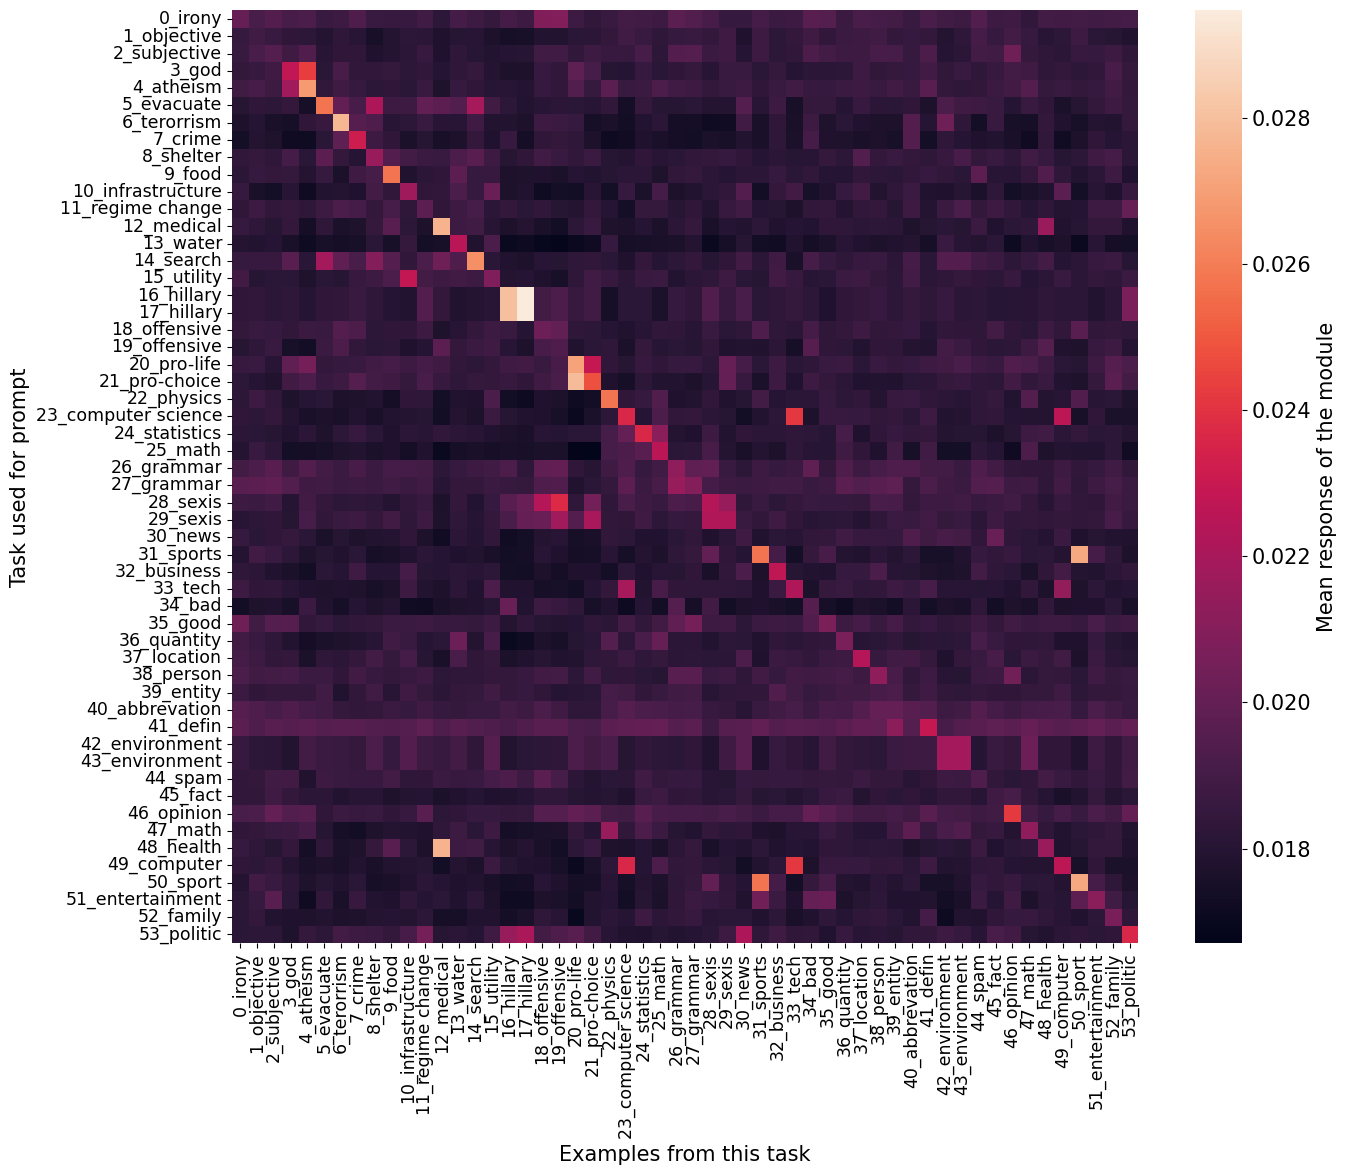

In [9]:
mp = mat
mp = softmax(mp, axis=0)
# divide each row by its max value
# mp = mp / (np.max(mp, axis=1).reshape(-1, 1))
# mp = mp / (np.max(mp, axis=0).T)
# mp = np.log(mp)

plt.figure(figsize=(14, 12))
# plt.title(os.path.basename(fname))
sns.heatmap(mp, cbar_kws={'label': 'Mean response of the module'})
labs = list(map(lambda x: x[3:], list(TASKS_D3.keys())))
plt.ylabel('Task used for prompt')
plt.xlabel('Examples from this task')
plt.yticks(np.arange(len(TASKS_D3)) + 0.5, labels=labs, rotation='horizontal', fontsize='small')
plt.xticks(np.arange(len(TASKS_D3)) + 0.5, labels=labs, rotation='vertical', fontsize='small')
plt.savefig('../results/figs/mean_preds_d3.pdf', bbox_inches='tight')
plt.show()

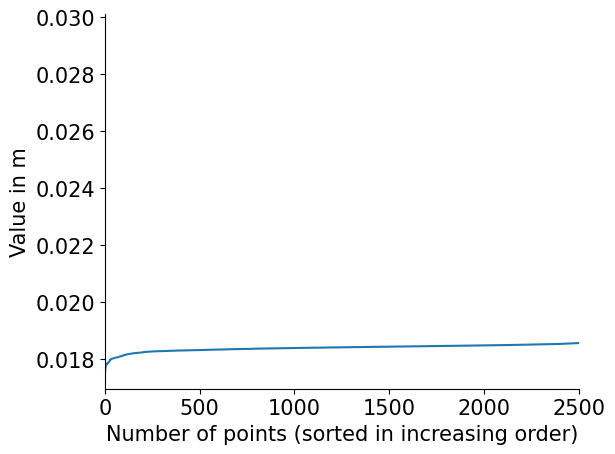

In [6]:
# plt.hist(m.flatten())
# plt.xscale('log')
plt.ylabel('Value in m')
plt.xlabel('Number of points (sorted in increasing order)')
plt.plot(np.sort(mp.flatten()))
plt.xlim((0, 2500))
plt.show()